<a href="https://colab.research.google.com/github/hqu/antivax_network_analysis/blob/main/Ranking_superspreaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: Upload Retweet_network_data.csv and load it into a table

from google.colab import files
uploaded = files.upload()

import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['Retweet_network_data.csv']))
df


Saving Retweet_network_data.csv to Retweet_network_data.csv


,Twitter Users,Retweeted User,Retweets,Generation,User followers
0,drsimonegold,Cernovich,20253,1,393522
1,Notyour28981739,bmj_latest,19185,1,11845
2,avoiceforchoice,ClayTravis,16952,1,8199
3,HegKong,ScienceWDrDoug,15496,1,35613
4,HegKong,RobertKennedyJr,15244,1,35734
...,...,...,...,...,...
1356,hibbsy1973,ake2306,0,2,2545
1357,AlietaEck,AAPSonline,0,2,17378
1358,LotusOak2,ChildrensHD,0,1,47438
1359,jorient,pfizer,4359,1,8021


In [ ]:
# prompt: Upload Retweet_network_data.csv and load it into a table

from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['Retweet_network_data.csv']))
print(df)


Saving Retweet_network_data.csv to Retweet_network_data (5).csv


KeyError: 'Retweet_network_data.csv'

In [ ]:
# prompt: create a network G using Twitter Users and Retweeted User

import networkx as nx

# Assuming 'Twitter User' and 'Retweeted User' are columns in your dataframe
G = nx.from_pandas_edgelist(df, source='Twitter Users', target='Retweeted User', create_using=nx.DiGraph())


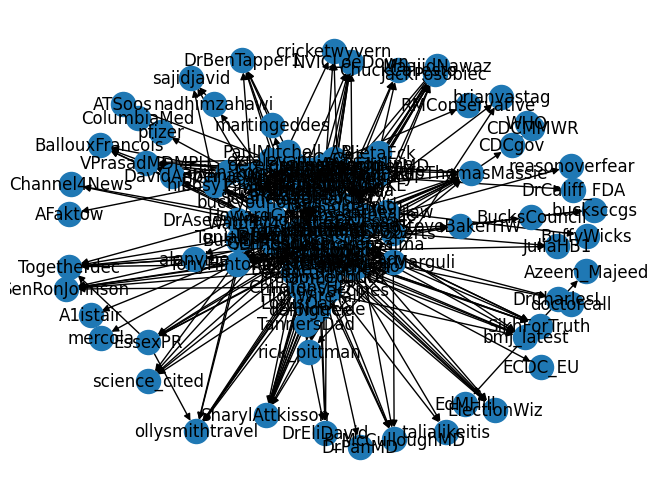

In [ ]:
# prompt: visualize graph G

import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)
plt.show()


In [ ]:
# prompt: create a list of all the nodes

# Get a list of all nodes
all_nodes = list(G.nodes())
print(all_nodes)


['drsimonegold', 'Cernovich', 'Notyour28981739', 'bmj_latest', 'avoiceforchoice', 'ClayTravis', 'HegKong', 'ScienceWDrDoug', 'RobertKennedyJr', 'ritamollerpalma', 'MythinformedMKE', 'ChildrensHD', 'YardleyShooting', 'SNCCLA', 'ClareCraigPath', 'P_McCulloughMD', 'Believe_Mothers', 'rick_pittman', 'danielkotzin', 'ChuckCallesto', 'RepThomasMassie', 'RandPaul', 'DrEliDavid', 'JenniferMarguli', 'dockaurG', 'jorient', 'akheriaty', 'ake2306', 'JackPosobiec', 'sallyKP', 'martingeddes', 'ElectionWiz', 'waynerohde', 'barnes_law', 'justiceforevee', 'Channel4News', 'BeckyJohnson222', 'DrTessaT', 'TonyHinton2016', 'DrAseemMalhotra', 'ezralevant', 'DrJBhattacharya', 'eileeniorio', 'delbigtree', 'DrBenTapper1', 'richardursomd', 'SikhForTruth', 'JeffereyJaxen', 'JamesMelville', 'ianmSC', 'MartinKulldorff', 'debnantz', 'jonrappoport', 'MaajidNawaz', 'toadmeister', 'aginnt', 'KimIversenShow', 'HighWireTalk', 'lifebiomedguru', 'GenRescue', 'TannersDad', 'SenRonJohnson', 'ollysmithtravel', 'SteveBakerHW'

In [ ]:
# prompt: calculate the degree centrality of all the nodes and save it in a new table df_nodes with the node name in the first column and centrality in the second column sorted in descending order

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Create a list of tuples (node, centrality)
node_centrality = [(node, centrality) for node, centrality in degree_centrality.items()]

# Sort the list in descending order of centrality
node_centrality.sort(key=lambda x: x[1], reverse=True)

# Create a DataFrame
df_nodes = pd.DataFrame(node_centrality, columns=['Node', 'Centrality'])

print(df_nodes)


                Node  Centrality
0    Notyour28981739    0.355072
1     ClareCraigPath    0.304348
2            jorient    0.224638
3    RobertKennedyJr    0.195652
4            sallyKP    0.195652
..               ...         ...
134      ColumbiaMed    0.007246
135         A1istair    0.007246
136          EdMHill    0.007246
137              WHO    0.007246
138   RMConservative    0.007246

[139 rows x 2 columns]


In [ ]:
# prompt: Export a CSV file of table with the nodes and their degree centrality, name the file points_degree_centrality.csv

from google.colab import files
df_nodes.to_csv('points_degree_centrality.csv', index = False)
files.download('points_degree_centrality.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: calculate the betweenness centrality of all the nodes and save it in a new table df_nodes_betweenness with the node name in the first column and betweenness centrality in the second column sorted in descending order

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Create a list of tuples (node, centrality)
node_centrality_betweenness = [(node, centrality) for node, centrality in betweenness_centrality.items()]

# Sort the list in descending order of centrality
node_centrality_betweenness.sort(key=lambda x: x[1], reverse=True)

# Create a DataFrame
df_nodes_betweenness = pd.DataFrame(node_centrality_betweenness, columns=['Node', 'Betweenness Centrality'])

print(df_nodes_betweenness)

df_nodes_betweenness.to_csv('points_betweenness_centrality.csv', index = False)



                Node  Betweenness Centrality
0     ClareCraigPath                0.100918
1        ToniaBuxton                0.054476
2         abiroberts                0.044669
3      JamesMelville                0.043166
4    Notyour28981739                0.041895
..               ...                     ...
134          EdMHill                0.000000
135       doctorcall                0.000000
136        bucksccgs                0.000000
137              WHO                0.000000
138   RMConservative                0.000000

[139 rows x 2 columns]


In [ ]:
files.download('points_betweenness_centrality.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: upload Twitter_Users_generation.csv and read it into a table

from google.colab import files
import pandas as pd

uploaded = files.upload()

df_gen = pd.read_csv(io.BytesIO(uploaded['Twitter_Users_generation.csv']))
print(df_gen)


Saving Twitter_Users_generation.csv to Twitter_Users_generation.csv
       Twitter Users Generation       Category
0            mercola         G1            NaN
1     forrestmaready         G1            NaN
2         TannersDad         G1            NaN
3    doctorsensation         G1            NaN
4       jonrappoport         G1            NaN
..               ...        ...            ...
147         JuliaHB1         G4            NaN
148          ECDC_EU         G4  Public Health
149        TheConWom         G4            NaN
150      Togetherdec         G4     Non-profit
151         dockaurG         G4            NaN

[152 rows x 3 columns]


In [ ]:
# prompt: merge df_gen and f_nodes using left merge

merged_df = pd.merge(df_gen, df_nodes, how='left', left_on='Twitter Users', right_on='Node')
print(merged_df)


       Twitter Users Generation       Category            Node  Centrality
0            mercola         G1            NaN         mercola    0.007246
1     forrestmaready         G1            NaN  forrestmaready    0.043478
2         TannersDad         G1            NaN      TannersDad    0.028986
3    doctorsensation         G1            NaN             NaN         NaN
4       jonrappoport         G1            NaN    jonrappoport    0.094203
..               ...        ...            ...             ...         ...
147         JuliaHB1         G4            NaN        JuliaHB1    0.014493
148          ECDC_EU         G4  Public Health         ECDC_EU    0.007246
149        TheConWom         G4            NaN             NaN         NaN
150      Togetherdec         G4     Non-profit     Togetherdec    0.050725
151         dockaurG         G4            NaN        dockaurG    0.072464

[152 rows x 5 columns]


In [ ]:
# prompt: save and download merged_df as nodes_degree_centality_generation

merged_df.to_csv('nodes_degree_centality_generation.csv', index = False)


In [ ]:
files.download('nodes_degree_centality_generation.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# END